# Probability of Default (PD) model

## Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Exploratory Data Analysis

In [2]:
# Uploading the csv file using Pandas

In [3]:
df = pd.read_csv("data.csv", index_col="Unnamed: 0", parse_dates = ["loan_start_date"])
df = df[df['loan_no'].isna()==False]

In [4]:
# Checking the data set for the analysis

In [5]:
df.head()

,loan_start_date,original_loan_amt,cv_link_score,cra_oldest_trade,cra_num_foreclosures,cra_num_repos,cra_num_derogs,cra_num_90_plus_12,cra_num_charge_offs,cra_num_past_due,...,days_past_due,loan_status,charge_off_dol,charge_off_type,credit_limit,vertical,loan_terms,loan_apr,cra_fico,loan_no
1,2017-10-17,455.98,703,154,0,0,0,0,0,0,...,0,Paid,0.0,NaN,4115,3,24.0,0.0754,776.0,6.931472e+09
2,2017-10-17,455.98,703,154,0,0,0,0,0,0,...,0,Paid,0.0,NaN,4115,3,18.0,0.0754,776.0,2.054280e+14
3,2017-10-17,455.98,703,154,0,0,0,0,0,0,...,0,Paid,0.0,NaN,4115,3,24.0,0.0754,776.0,6.931472e+09
4,2017-10-17,455.98,703,154,0,0,0,0,0,0,...,0,Paid,0.0,NaN,4115,3,18.0,0.0754,776.0,2.054280e+14
5,2017-10-17,455.98,703,154,0,0,0,0,0,0,...,0,Paid,0.0,NaN,4115,3,24.0,0.0754,776.0,6.931472e+09


In [6]:
# Checking the shape of the dataset
df.shape

(636499, 27)

In [7]:
# Understanding the data set
df.describe()

,original_loan_amt,cv_link_score,cra_oldest_trade,cra_num_foreclosures,cra_num_repos,cra_num_derogs,cra_num_90_plus_12,cra_num_charge_offs,cra_num_past_due,cra_num_total_collections,...,bs_name_mismatch_ind,month_on_book,days_past_due,charge_off_dol,credit_limit,vertical,loan_terms,loan_apr,cra_fico,loan_no
count,636499.000000,636499.000000,636499.000000,636499.000000,636499.000000,636499.000000,636499.000000,636499.000000,636499.000000,636499.000000,...,636499.000000,636499.000000,636499.000000,636499.000000,636499.000000,636499.000000,636499.00000,636499.000000,636499.000000,6.364990e+05
mean,1465.403590,600.823744,182.691140,0.000859,0.002531,0.157823,0.045482,0.013463,0.024244,0.612510,...,0.006068,6.289875,5.212681,46.550085,3468.127669,4.951334,21.74854,0.164157,697.675214,1.732502e+14
std,1449.546855,198.814974,101.049436,0.033223,0.050246,0.560278,0.483059,0.166512,0.274038,1.846452,...,0.077658,4.313186,21.817853,346.297357,2681.966479,3.297405,9.23257,0.088656,67.322467,9.794855e+13
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.00000,0.024600,3.000000,6.931472e+09
25%,507.470000,616.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,1750.000000,3.000000,12.00000,0.085400,654.000000,8.976949e+13
50%,1101.430000,655.000000,165.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.000000,0.000000,0.000000,2500.000000,5.000000,18.00000,0.175400,693.000000,1.751444e+14
75%,1916.850000,694.000000,231.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,9.000000,0.000000,0.000000,5000.000000,6.000000,30.00000,0.275400,738.000000,2.565546e+14
max,15000.000000,809.000000,744.000000,3.000000,1.000000,31.000000,25.000000,11.000000,14.000000,42.000000,...,1.000000,21.000000,278.000000,12011.000000,25000.000000,13.000000,48.00000,0.275400,853.000000,3.443209e+14


In [8]:
# Information regarding the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636499 entries, 1 to 637490
Data columns (total 27 columns):
loan_start_date                    636499 non-null datetime64[ns]
original_loan_amt                  636499 non-null float64
cv_link_score                      636499 non-null int64
cra_oldest_trade                   636499 non-null int64
cra_num_foreclosures               636499 non-null int64
cra_num_repos                      636499 non-null int64
cra_num_derogs                     636499 non-null int64
cra_num_90_plus_12                 636499 non-null int64
cra_num_charge_offs                636499 non-null int64
cra_num_past_due                   636499 non-null int64
cra_num_total_collections          636499 non-null int64
cra_num_credit_inquiries_last_6    636499 non-null int64
email_count                        636499 non-null int64
mobile_count                       636499 non-null int64
bs_mismatch_ind                    636499 non-null int64
bs_name_mismatch_ind   

In [9]:
# Columns of the dataframe
df.columns

Index(['loan_start_date', 'original_loan_amt', 'cv_link_score',
       'cra_oldest_trade', 'cra_num_foreclosures', 'cra_num_repos',
       'cra_num_derogs', 'cra_num_90_plus_12', 'cra_num_charge_offs',
       'cra_num_past_due', 'cra_num_total_collections',
       'cra_num_credit_inquiries_last_6', 'email_count', 'mobile_count',
       'bs_mismatch_ind', 'bs_name_mismatch_ind', 'month_on_book',
       'days_past_due', 'loan_status', 'charge_off_dol', 'charge_off_type',
       'credit_limit', 'vertical', 'loan_terms', 'loan_apr', 'cra_fico',
       'loan_no'],
      dtype='object')

In [10]:
# Understanding the values of the "loan_status" column
set(df['loan_status'])

{'1 DPD', '30 DPD', '60 DPD', '90 DPD', 'Charged Off', 'Current', 'Paid'}

In [11]:
# Generating a count plot to understand the frequency of each unit in "loan_status"

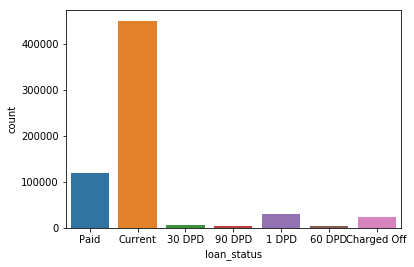

In [12]:
p = sns.countplot(data=df, x = 'loan_status')

In [13]:
df["loan_status"].value_counts()

Current        450615
Paid           118938
1 DPD           30486
Charged Off     22649
30 DPD           6245
60 DPD           4192
90 DPD           3374
Name: loan_status, dtype: int64

In [14]:
len(df[df['loan_status']=='Current'])/df.shape[0]

0.7079586927866344

We can see that the data contains a large amount of current loan status (450615) as compared to other values. The data has 70% current values.


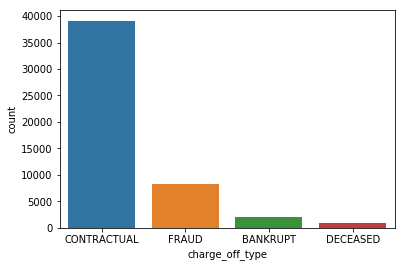

In [15]:
# Count plot for charge_off_type
q = sns.countplot(data=df, x = 'charge_off_type')

In [16]:
df["charge_off_type"].value_counts()

CONTRACTUAL    39101
FRAUD           8371
BANKRUPT        2068
DECEASED         880
Name: charge_off_type, dtype: int64

In [17]:
len(df[df["charge_off_type"]=='DECEASED'])/df.shape[0]

0.0013825630519450935

We expect to observe a charge off of 0.00138 becasue of death as a factor.

In [19]:
# Calculating the length of performance column (as the value provided in the problem were loan * month on book, 
#we assuemd that loan is "original_loan_amt)

In [20]:
df['length_of_performance'] = np.multiply(df['original_loan_amt'], df['month_on_book'])

In [21]:
# Understanding length of performance

/Users/Mohit/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


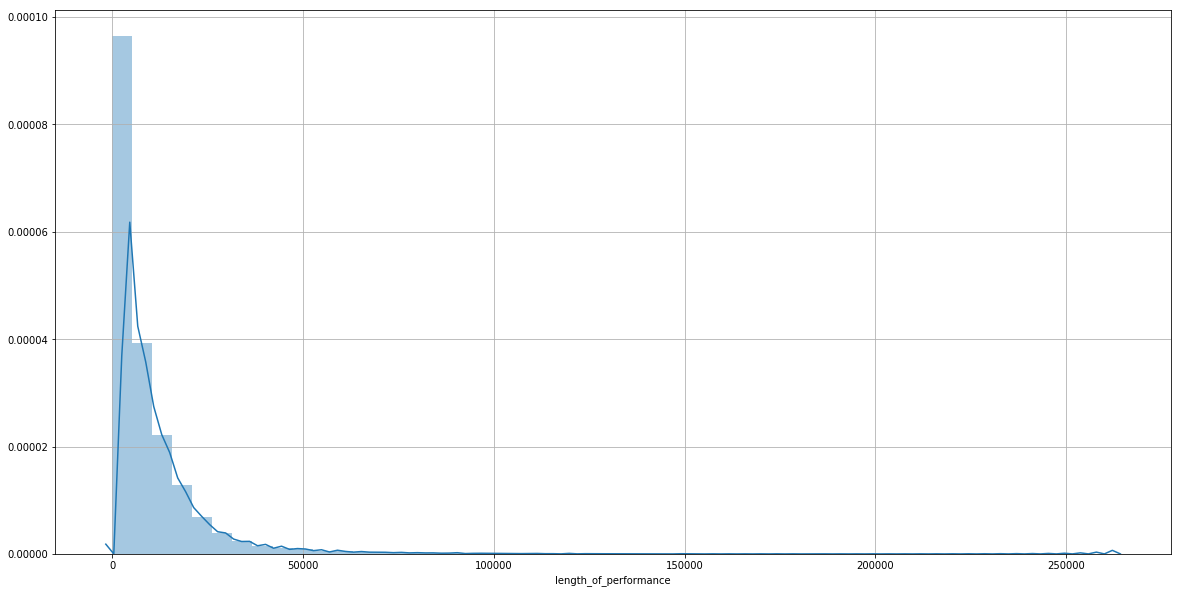

In [22]:
plt.figure(figsize=(20,10))
plt.grid()
_ = sns.distplot(df['length_of_performance'])

/Users/Mohit/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


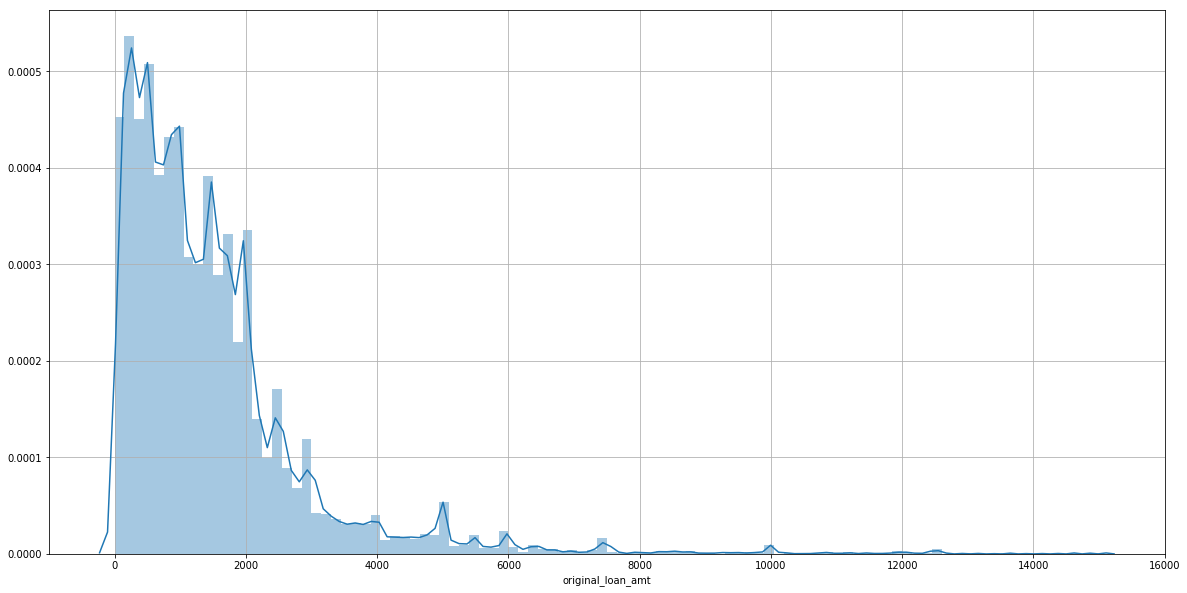

In [23]:
#Distribution plot for "original_loan_amt"
plt.figure(figsize=(20,10))
plt.grid()
ax = sns.distplot(df['original_loan_amt'], bins=100, kde= True)

The original loan amount is mostly distributed between Zero dollars to Three Thousand dollars

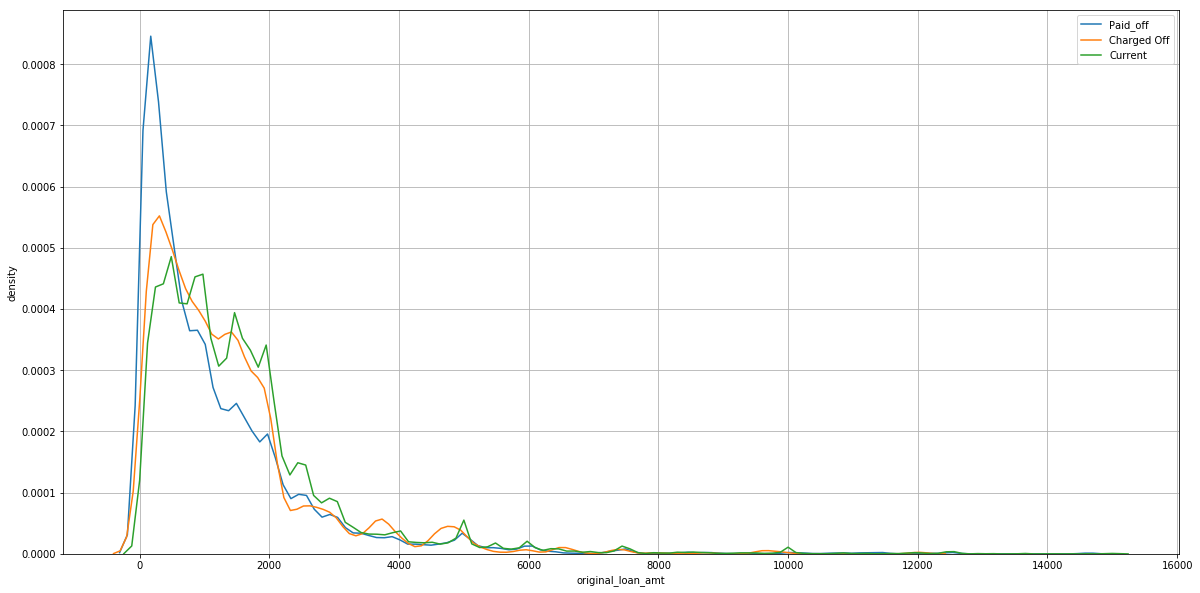

In [24]:
plt.figure(figsize=(20,10))
plt.grid()
ax = sns.kdeplot(df[df['loan_status']=='Paid']['original_loan_amt'])
ax = sns.kdeplot(df[df['loan_status']=='Charged Off']['original_loan_amt'])
ax = sns.kdeplot(df[df['loan_status']=='Current']['original_loan_amt'])
aa = plt.legend(['Paid_off','Charged Off', 'Current'])
_ = plt.xlabel('original_loan_amt')
_ = plt.ylabel('density')

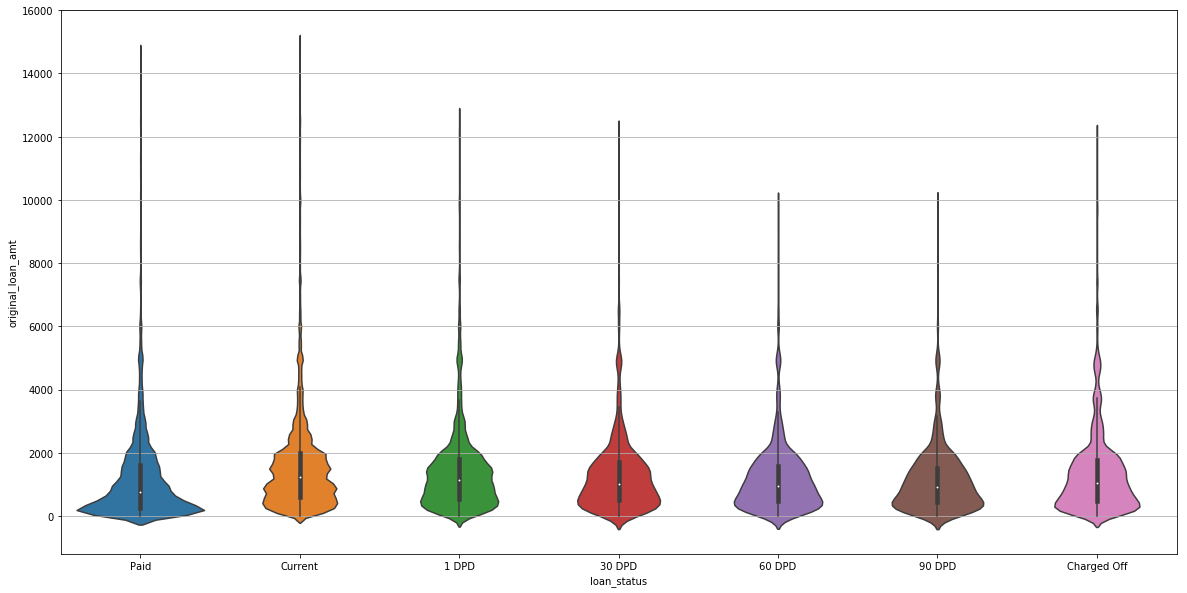

In [25]:
# Understanding the relationship between loan_status and original_loan_amount
plt.figure(figsize=(20,10))
plt.grid()
ax = sns.violinplot(x="loan_status", y="original_loan_amt", data=df, order = ['Paid','Current','1 DPD', '30 DPD','60 DPD', '90 DPD', 'Charged Off'])

From the above plot, we can clearly observed that there is a higher chances of loanee returning the loan on or before time if the original loan amount is zero to one thounsand dollars.

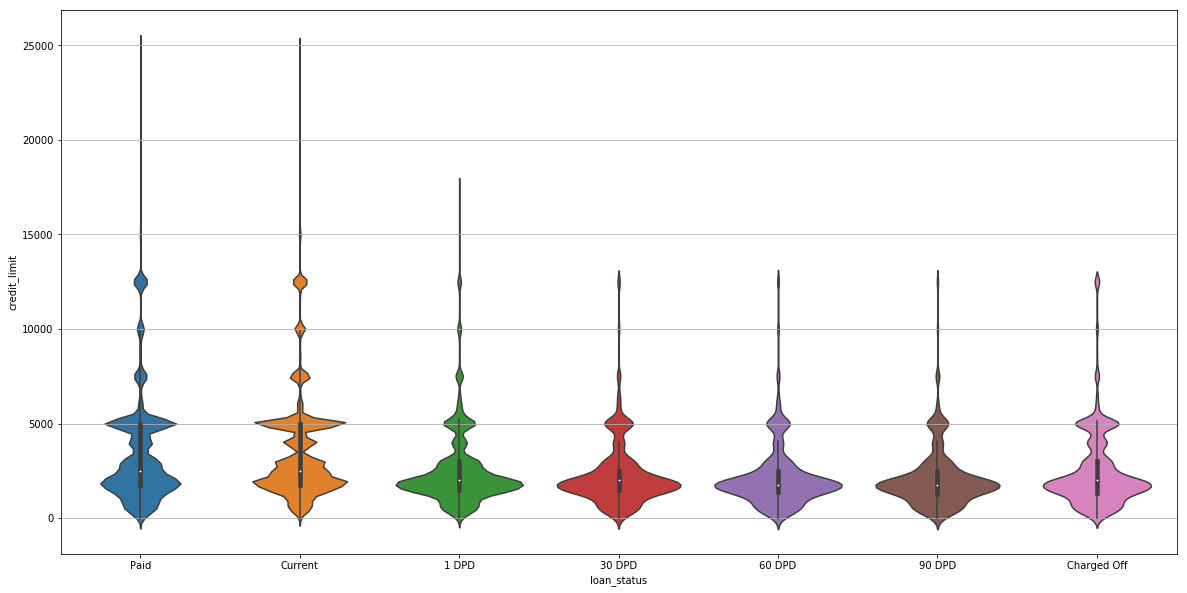

In [27]:
# Understanding the relationship between loan_status and credit limit
plt.figure(figsize=(20,10))
plt.grid()
ax = sns.violinplot(x="loan_status", y="credit_limit", data=df, order = ['Paid','Current','1 DPD', '30 DPD','60 DPD', '90 DPD', 'Charged Off'])

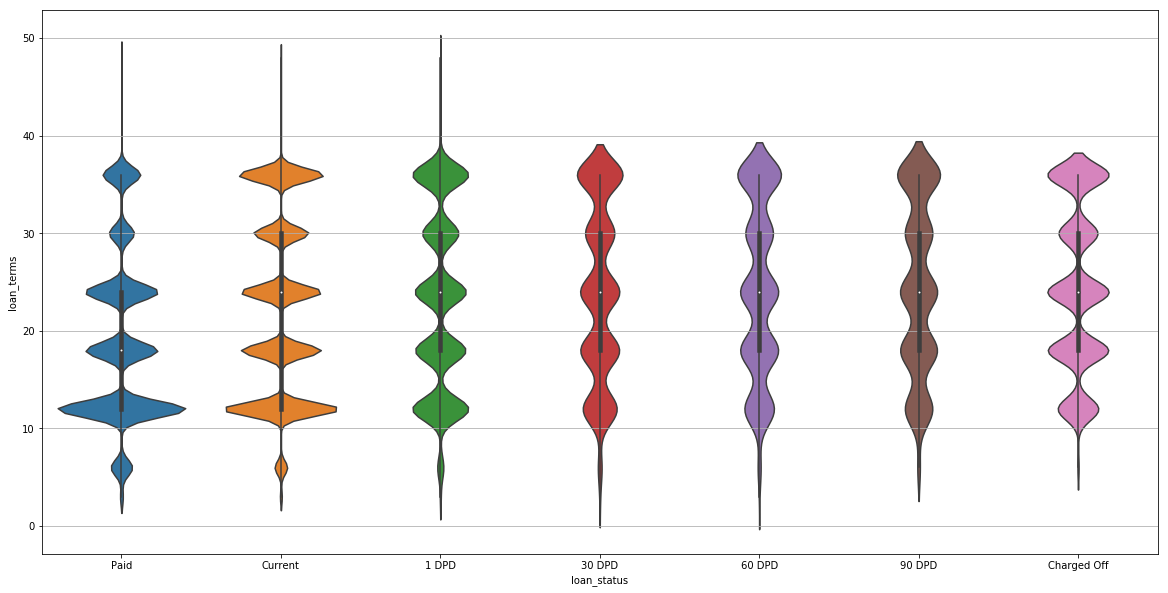

In [29]:
# Understanding the relationship between loan_status and loan_terms
plt.figure(figsize=(20,10))
plt.grid()
ax = sns.violinplot(x="loan_status", y="loan_terms", data=df, order = ['Paid','Current','1 DPD', '30 DPD','60 DPD', '90 DPD', 'Charged Off'])

From the above plot, we can clearly see that loan approved for approx 24 months have high probability to be charged off when we compare it with those loan that were paid off. Most of the loan approved for 12 months are paid off.

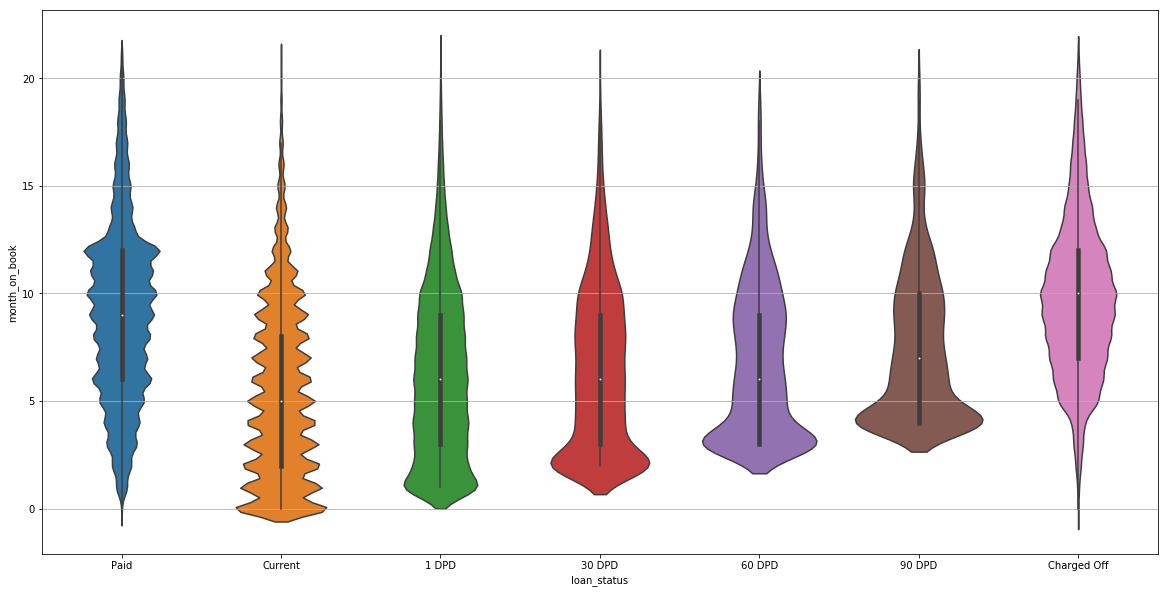

In [30]:
# Understanding the relationship between loan_status and month_on_book
plt.figure(figsize=(20,10))
plt.grid()
ax = sns.violinplot(x="loan_status", y="month_on_book", data=df, order = ['Paid','Current','1 DPD', '30 DPD','60 DPD', '90 DPD', 'Charged Off'])

From the above plot, we can clearly see that the loans which are on the books for around 10 months have high probability to default.

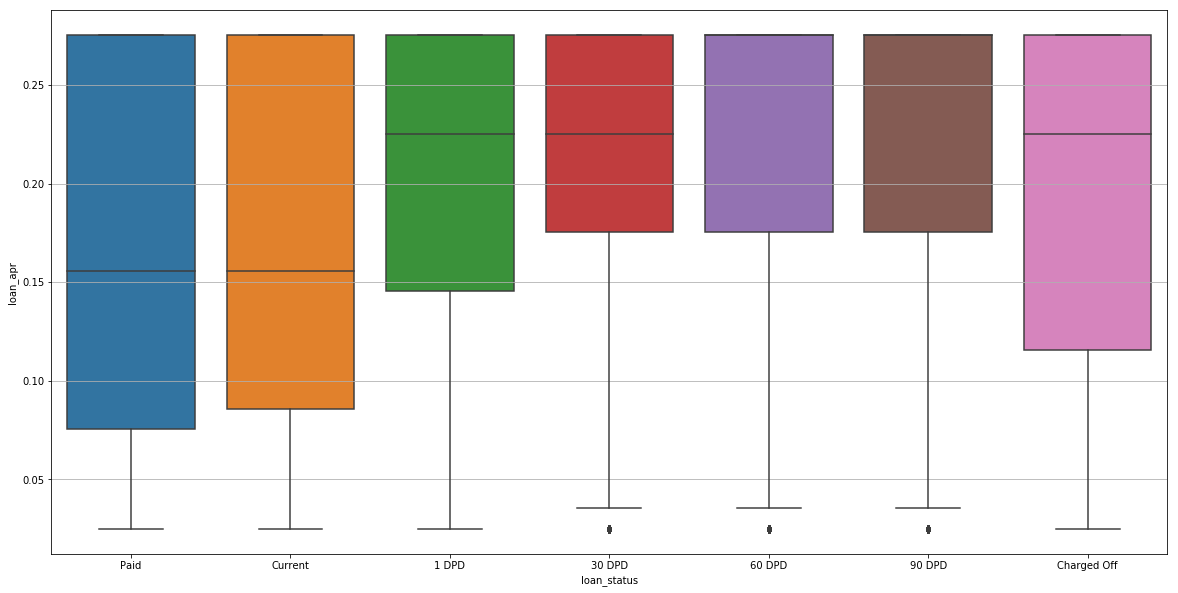

In [31]:
# Understanding the relationship between loan_status and loan_apr
plt.figure(figsize=(20,10))
plt.grid()
ax = sns.boxplot(x="loan_status", y="loan_apr", data=df, order = ['Paid','Current','1 DPD', '30 DPD','60 DPD', '90 DPD', 'Charged Off'])

From the above plot, we can clearly see that the loanee with a loan apr of 0.23 are more likely to default and loanee with a loan apr of 0.17 are more likely to pay off the loans.

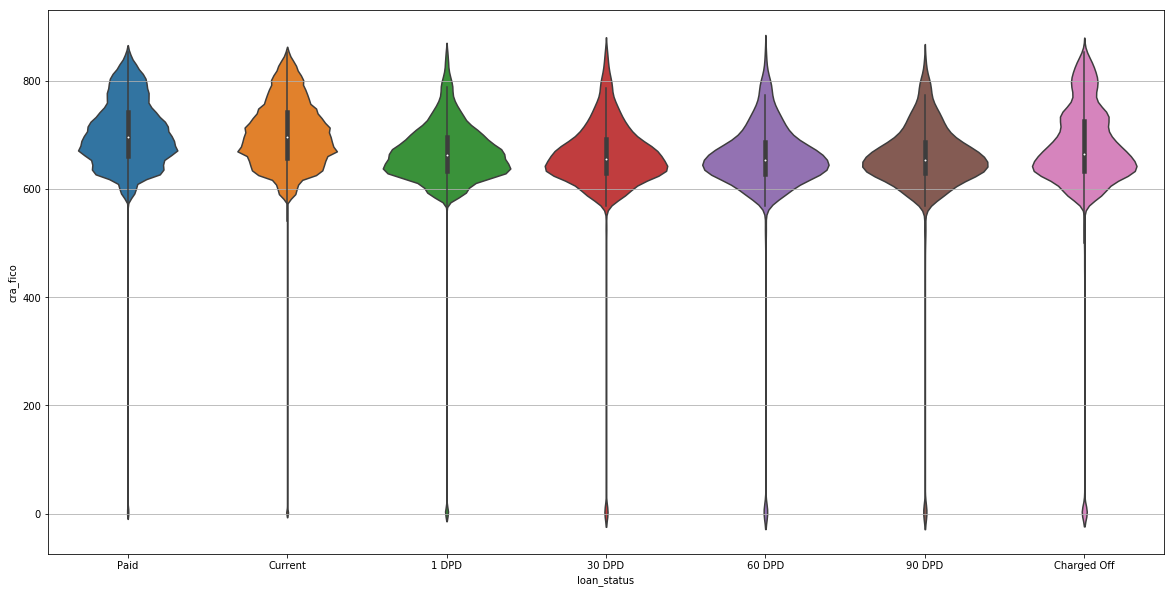

In [33]:
# Understanding the relationship between loan_status and cra_fico
plt.figure(figsize=(20,10))
plt.grid()
ax = sns.violinplot(x="loan_status", y="cra_fico", data=df, order = ['Paid','Current','1 DPD', '30 DPD','60 DPD', '90 DPD', 'Charged Off'])

From the above plot, we can clearly see that the loanee with a fico score of less than 680 are more likely to default and loanee with a fico score of more than 700 are more likely to pay off the loans.

In [35]:
# Generating a heat map to understand the correlation between different variables

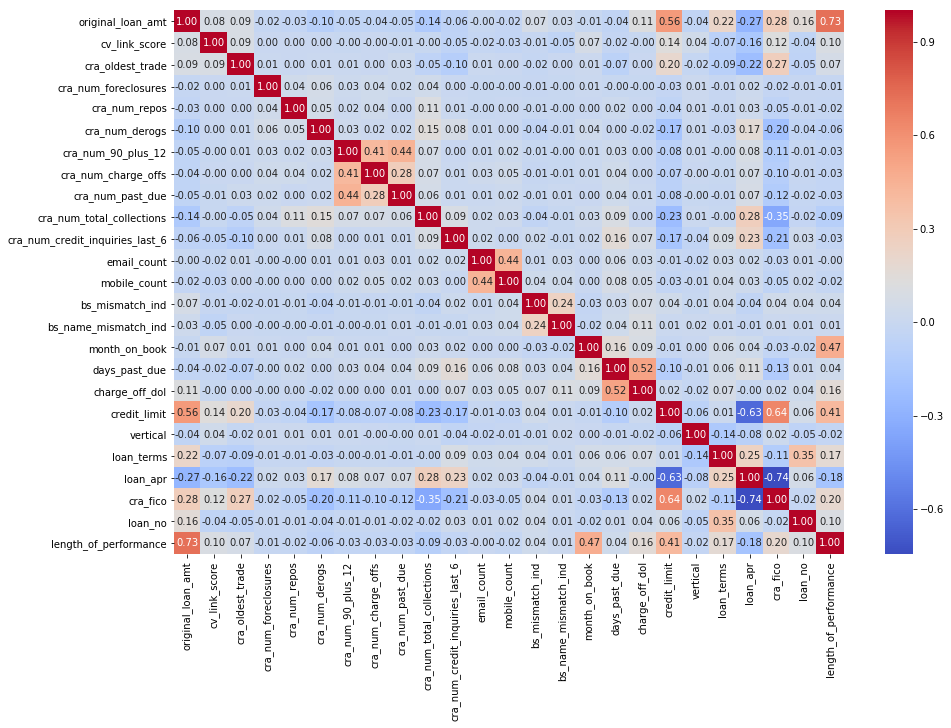

In [36]:
fig, ax = plt.subplots(figsize=(15,10)) 
g = sns.heatmap(df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

From the above plot, we can clearly see the different variables are correlated with each other both postively and negatively.

## Data Preprocessing

In [38]:
# Generating a new column called next_loan_status which will have information about the 
#next value of the loan_status for a loanee based on the month on book

In [39]:
df['next_state'] = '_'

In [59]:
loans = list(set(df['loan_no']))
i=0
for loan in loans:
    i+=1
    tmp_next_state = df[df['loan_no']==loan].sort_values(['month_on_book'], ascending=[1])['loan_status'].shift(-1).fillna(method='ffill')
    df.loc[df['loan_no']==loan, 'next_state'] = tmp_next_state
    #print(df[df['loan_no']==loan].sort_values(['month_on_book'], ascending=[1])['next_state'])

In [41]:
# Removing certain paid and charged off value on the basis of the assumption that once these conditions are achieved the remaining values would be the same for the loan terms 

In [42]:
loans = list(set(df['loan_no']))
indexes_to_keep = []
i=0
for loan in loans:
    pp = df[df['loan_no']==loan].sort_values(['month_on_book'], ascending=[1])
    tmp_indexes = list(pp.index)

    for index, row in pp.iterrows():
        if (row['loan_status']=='Paid' or row['loan_status']=='Charged Off'):
            indexes_to_keep.append(index)
            break
        else:
            indexes_to_keep.append(index)

In [43]:
len(indexes_to_keep)

521268

In [44]:
# Saving this information into a new data csv file which will be further used for model generation.

In [45]:
df.loc[indexes_to_keep,:].to_csv('/Users/Mohit/Desktop/Bread/data_with_next_state.csv', index =False)

## Model Building

In [98]:
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st
from sklearn import preprocessing

In [99]:
# Reading the new csv file as df1 using pandas
# Dropping the columns which have very less correlation based on Heatmap

In [100]:
df1 = pd.read_csv("data_with_next_state.csv")
df1 = df1.drop(['loan_start_date','email_count','mobile_count','charge_off_dol','charge_off_type'], axis=1)

In [101]:
# Created dummy variables for the categorical dataset ("loan_status")

In [102]:
df1 = shuffle(df1)
one_hot = pd.get_dummies(df1.loc[:,('loan_status')])
# Drop column B as it is now encoded
# Join the encoded df1
df1 = df1.join(one_hot)
df1 = df1.drop(['loan_status'], axis=1)

In [103]:
df1.columns

Index(['original_loan_amt', 'cv_link_score', 'cra_oldest_trade',
       'cra_num_foreclosures', 'cra_num_repos', 'cra_num_derogs',
       'cra_num_90_plus_12', 'cra_num_charge_offs', 'cra_num_past_due',
       'cra_num_total_collections', 'cra_num_credit_inquiries_last_6',
       'bs_mismatch_ind', 'bs_name_mismatch_ind', 'month_on_book',
       'days_past_due', 'credit_limit', 'vertical', 'loan_terms', 'loan_apr',
       'cra_fico', 'loan_no', 'next_state', '1 DPD', '30 DPD', '60 DPD',
       '90 DPD', 'Charged Off', 'Current', 'Paid'],
      dtype='object')

In [142]:
df1.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19]] = preprocessing.normalize(df1.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19]])
lbl = preprocessing.LabelEncoder()
lbl.fit(list(df1['next_state'].values))
df1['next_state'] = lbl.transform(list(df1['next_state'].values))
X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28]], df1.iloc[:,21], test_size=0.2, random_state=42)

In [143]:
import xgboost as xgb
from sklearn import datasets
from sklearn.datasets import dump_svmlight_file
from sklearn.externals import joblib
from sklearn.metrics import precision_score

In [145]:

# use DMatrix for xgbosot
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


# set xgboost params
param = {'nthread':4, #when use hyperthread, xgboost may become slower
                  'objective':'multi:softprob',
                  'learning_rate': 0.01, #so called eta value
                  'num_class':7,
                  'max_depth': 6,
                  'silent': 1,
                  'subsample': 0.7,
                  'colsample_bytree': 0.7,
                  'n_estimators': 800,
                  'reg_alpha': 0.1
                 }  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

#------------- numpy array ------------------
# training and testing - numpy matrices
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

# extracting most confident predictions
best_preds = np.asarray([np.argmax(line) for line in preds])
print ("Numpy array precision:", precision_score(y_test, best_preds, average='macro'))

Numpy array precision: 0.7986265866520397


In [146]:
# Importing confusion metrics, accuracy score and classification report

In [147]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

[[ 1548     5   108    23    17  4940     0]
 [  488    49   140     5     3   627     0]
 [    0     0   764    88     1     0     0]
 [    0     0     0   685    38     0     0]
 [    6     1    22    28  1317    51     0]
 [  841     8   114    22     5 83142     1]
 [   93     0    23     8     4  4460  4579]]




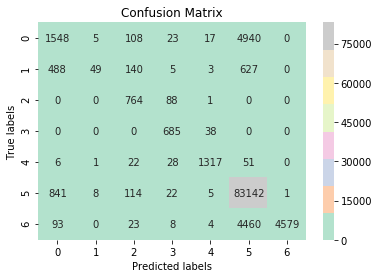

In [148]:
# Confusion Matrix:
cm = confusion_matrix(y_test, best_preds)
print (cm)
print("\n")

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g', cmap="Pastel2"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel("Predicted labels");ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix");

In [149]:
# Classification Report:
print(classification_report(y_test, best_preds))

             precision    recall  f1-score   support

          0       0.52      0.23      0.32      6641
          1       0.78      0.04      0.07      1312
          2       0.65      0.90      0.75       853
          3       0.80      0.95      0.87       723
          4       0.95      0.92      0.94      1425
          5       0.89      0.99      0.94     84133
          6       1.00      0.50      0.67      9167

avg / total       0.87      0.88      0.86    104254



In [150]:
# Accuracy Score:
print("Model Accuracy: ", accuracy_score(y_test, best_preds))

Model Accuracy:  0.8832658698946803


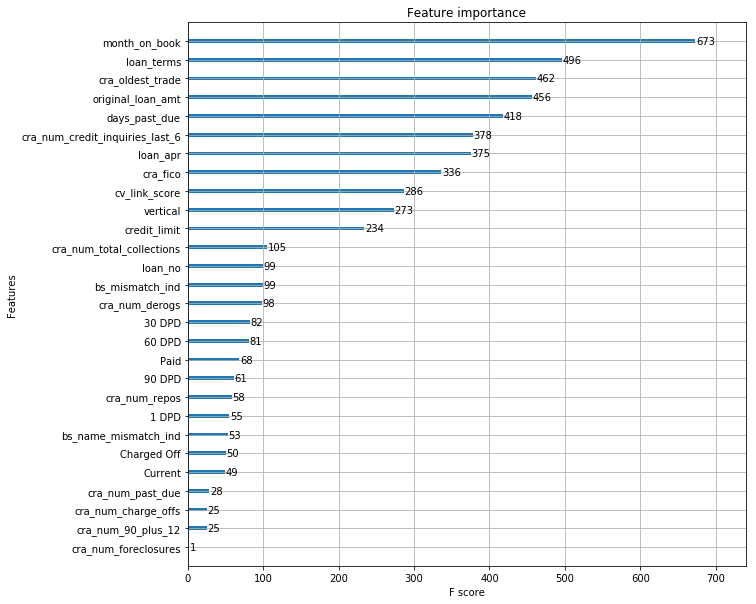

In [172]:
from xgboost import plot_importance
ax = xgb.plot_importance(bst)
fig = ax.figure
fig.set_size_inches(10, 10)

We can see from the above graph that month_on_book and Loan_terms are the most important features to determine whether a loanee will default or not.

### The probability of a loanee to move from one state to any other state

In [192]:
final_df = pd.DataFrame(preds, columns=lbl.inverse_transform([0,1,2,3,4,5,6]))
final_df['loan_no'] = X_test.iloc[:,[20]].values
final_df.head()

/Users/Mohit/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,1 DPD,30 DPD,60 DPD,90 DPD,Charged Off,Current,Paid,loan_no
0,0.168400,0.127904,0.127628,0.126783,0.128285,0.179514,0.141486,1.066754e+13
1,0.174404,0.128242,0.128266,0.127118,0.129069,0.175064,0.137837,2.126090e+14
2,0.163907,0.128900,0.128924,0.127770,0.129468,0.183001,0.138030,3.413611e+14
3,0.175461,0.127104,0.127406,0.125990,0.127711,0.178741,0.137588,3.118469e+14
4,0.156253,0.193019,0.129757,0.130894,0.131643,0.128606,0.129827,8.430749e+13


After perofrming XGBoost multiclass classification on the data provided, we found that our model have a **precision of 0.87, F-1 Score of 0.86, Recall of 0.88 and an accuracy of 0.88**

## Generating a model using SMOTE 

As we can see the dataset is a bit imbalanced because of the presence of current state for 70% of the data and if we try to use this data and apply a machine learning classifier model, there is a decent chance of having a biased prediction. We will use Synthetic Minority Oversampling Technique (SMOTE) method to balance the dataset and check the performance of the model.

In [154]:
# Performing the analysis using SMOTE on the data set

In [155]:
df2 = pd.read_csv("data_with_next_state.csv")
df2 = df2.drop(['loan_start_date','email_count','mobile_count','charge_off_dol','charge_off_type'], axis=1)

In [156]:
# Performing shuffle and one hot encoding on the loan_status column

In [173]:
df2 = shuffle(df2)
one_hot = pd.get_dummies(df2.loc[:,('loan_status')])
# Drop column B as it is now encoded
# Join the encoded df
df2 = df2.join(one_hot)
df2 = df2.drop(['loan_status'], axis=1)

In [174]:
df2.columns

Index(['original_loan_amt', 'cv_link_score', 'cra_oldest_trade',
       'cra_num_foreclosures', 'cra_num_repos', 'cra_num_derogs',
       'cra_num_90_plus_12', 'cra_num_charge_offs', 'cra_num_past_due',
       'cra_num_total_collections', 'cra_num_credit_inquiries_last_6',
       'bs_mismatch_ind', 'bs_name_mismatch_ind', 'month_on_book',
       'days_past_due', 'credit_limit', 'vertical', 'loan_terms', 'loan_apr',
       'cra_fico', 'loan_no', 'next_state', '1 DPD', '30 DPD', '60 DPD',
       '90 DPD', 'Charged Off', 'Current', 'Paid'],
      dtype='object')

In [175]:
# Performing data preprocessing using Label Encoder

In [176]:
df2.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19]] = preprocessing.normalize(df2.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19]])
lbl = preprocessing.LabelEncoder()
lbl.fit(list(df2['next_state'].values))
df2['next_state'] = lbl.transform(list(df2['next_state'].values))

X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,22,23,24,25,26,27,28]], df2.iloc[:,21] , test_size=0.2, random_state=42)

In [179]:
# Performing SMOTE on the train data set
from imblearn.over_sampling import SMOTE

In [181]:
# use DMatrix for xgbosot
smote = SMOTE(ratio= 'auto', kind='regular')
S_X, S_y = smote.fit_sample(X_train.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,23,24,25,26,27]], y_train)
S_X = pd.DataFrame(S_X, columns=['original_loan_amt',
 'cv_link_score','cra_oldest_trade','cra_num_foreclosures','cra_num_repos','cra_num_derogs',
 'cra_num_90_plus_12',
 'cra_num_charge_offs','cra_num_past_due','cra_num_total_collections','cra_num_credit_inquiries_last_6',
 'bs_mismatch_ind','bs_name_mismatch_ind','month_on_book','days_past_due','credit_limit','vertical','loan_terms','loan_apr','cra_fico','30 DPD','60 DPD','90 DPD','Charged Off','Current','Paid'])

dtrain1 = xgb.DMatrix(S_X, label=S_y)
dtest1 = xgb.DMatrix(X_test.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,23,24,25,26,27]], label=y_test)


# set xgboost params
param = {'nthread':4, #when use hyperthread, xgboost may become slower
                  'objective':'multi:softprob',
                  'learning_rate': 0.01, #so called `eta` value
                  'num_class':7,
                  'max_depth': 6,
                  'silent': 1,
                  'subsample': 0.7,
                  'colsample_bytree': 0.7,
                  'n_estimators': 800,
                  'reg_alpha': 0.1
                 }  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations

In [183]:
bst = xgb.train(param, dtrain1, num_round)
preds = bst.predict(dtest1)

# extracting most confident predictions
best_preds = np.asarray([np.argmax(line) for line in preds])
print ("Numpy array precision:", precision_score(y_test, best_preds, average='macro'))

Numpy array precision: 0.6261278091869985


[[  620  2526   123    31    10  3131    61]
 [    0  1194   144     3     3     0     0]
 [    0     1   796    86     2     0     0]
 [    0     0     0   674    54     0     0]
 [    0    39    28    23  1284    24     0]
 [ 6177  2193   104    18     2 74526  1398]
 [  269   215    29     8     3  3152  5303]]




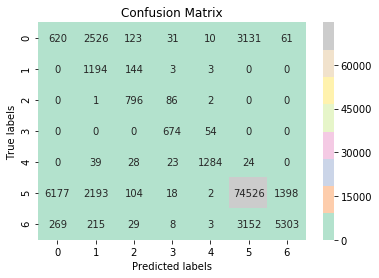

In [184]:
# Confusion Matrix:
cm = confusion_matrix(y_test, best_preds)
print (cm)
print("\n")

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g', cmap="Pastel2"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel("Predicted labels");ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix");

In [185]:
# Classification Report
print(classification_report(y_test, best_preds))

             precision    recall  f1-score   support

          0       0.09      0.10      0.09      6502
          1       0.19      0.89      0.32      1344
          2       0.65      0.90      0.75       885
          3       0.80      0.93      0.86       728
          4       0.95      0.92      0.93      1398
          5       0.92      0.88      0.90     84418
          6       0.78      0.59      0.67      8979

avg / total       0.85      0.81      0.82    104254



In [186]:
print("Model Accuracy: ", accuracy_score(y_test, best_preds))

Model Accuracy:  0.8095324879620925


After using SMOTE for producing synthetic data and perofrming XGBoost multiclass classification on the data provided, we found that our model have a **precision of 0.85, F-1 Score of 0.82, Recall: 0.81 and an accuracy of 0.80**